## Loading libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import numpy as np
from scipy.misc import imread, imsave
from pathlib import Path

import matplotlib.pyplot as plt
%matplotlib inline

from src.enhancer import ImageComparator
from src.enhancer.enhancers import ENHANCERS

## Setting up paths

In [50]:
base_path = Path('test-4')
originals_path = base_path / 'original'
masks_path = base_path / 'mask'
weight_maps_path = base_path / 'weight-map'

## Loading z-values and image/segmentation

In [51]:
from matplotlib.ticker import NullLocator

def save_image(path, title, image):
    plt.gca().set_axis_off()
    plt.gca().xaxis.set_major_locator(NullLocator())
    plt.gca().yaxis.set_major_locator(NullLocator())
    
    plt.imshow(image)
#     plt.title(title[:-5].replace("_"," "), y=-0.2, fontsize=32)
    plt.savefig(str(path), transparent = True, bbox_inches='tight', pad_inches=0)

In [52]:
from src.descriptors.descriptors import DESCRIPTORS

def enhance(keyword, zfile, zfile_l):
    zcollection = pickle.load(open(zfile, 'rb'))
    zcollection_l = pickle.load(open(zfile_l, 'rb'))

    image = imread(originals_path / ('%s.jpg' % keyword))
    mask_path = masks_path / ('%s-mask.png' % keyword)
    if mask_path.exists():
        seg_b = imread(mask_path).astype(np.bool)
    else:
        seg_b = imread(masks_path / ('%s-mask.jpg' % keyword)).astype(np.bool)
    
    
    image_comparator = ImageComparator()
    top_n = 3

    im_path = base_path / keyword
    im_path.mkdir(exist_ok=True, parents=True)

    # Global z, Global descriptor
    cis = image_comparator.compare(image, zcollection)[:top_n]
    for idx, ci in enumerate(cis):
        key = ci.key
        delta = ci.delta
        z_delta = zcollection.descriptors[key].descriptor * delta
        # Global enhancement
        result_g_g_g = ENHANCERS[key].enhance(image, z_delta, 1)
        save_image(im_path / ('ggg-%s.jpg' % (idx + 1)), key, result_g_g_g)
        # Local enhancement
        result_g_g_l = ENHANCERS[key].enhance(image, z_delta, 1, mask=seg_b)
        save_image(im_path / ('ggl-%s.jpg' % (idx + 1)), key, result_g_g_l)



    # Global z, Local descriptor
    cis = image_comparator.compare(image, zcollection, mask=seg_b)[:top_n]
    for idx, ci in enumerate(cis):
        key = ci.key
        delta = ci.delta
        z_delta = zcollection.descriptors[key].descriptor * delta
        # Global enhancement
        result_g_l_g = ENHANCERS[key].enhance(image, z_delta, 1)
        save_image(im_path / ('glg-%s.jpg' % (idx + 1)), key, result_g_l_g)
        # Local enhancement
        result_g_l_l = ENHANCERS[key].enhance(image, z_delta, 1, mask=seg_b)
        save_image(im_path / ('gll-%s.jpg' % (idx + 1)), key, result_g_l_l)



    # Local z, Global descriptor
    cis = image_comparator.compare(image, zcollection_l)[:top_n]
    for idx, ci in enumerate(cis):
        key = ci.key
        delta = ci.delta
        z_delta = zcollection.descriptors[key].descriptor * delta
        # Global enhancement
        result_l_g_g = ENHANCERS[key].enhance(image, z_delta, 1)
        save_image(im_path / ('lgg-%s.jpg' % (idx + 1)), key, result_l_g_g)
        # Local enhancement
        result_l_g_l = ENHANCERS[key].enhance(image, z_delta, 1, mask=seg_b)
        save_image(im_path / ('lgl-%s.jpg' % (idx + 1)), key, result_l_g_l)



    # Local z, Local descriptor
    cis = image_comparator.compare(image, zcollection_l, mask=seg_b)[:top_n]
    for idx, ci in enumerate(cis):
        key = ci.key
        delta = ci.delta
        z_delta = zcollection.descriptors[key].descriptor * delta
        # Global enhancement
        result_l_l_g = ENHANCERS[key].enhance(image, z_delta, 1)
        save_image(im_path / ('llg-%s.jpg' % (idx + 1)), key, result_l_l_g)
        # Local enhancement
        result_l_l_l = ENHANCERS[key].enhance(image, z_delta, 1, mask=seg_b)
        save_image(im_path / ('lll-%s.jpg' % (idx + 1)), key, result_l_l_l)

strawberry-2


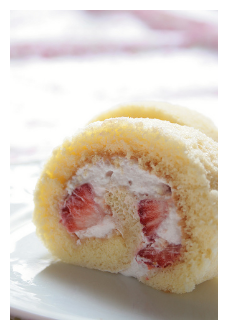

In [9]:
tuples = [
            ('strawberry-1', 'z-values/strawberry.pkl', 'z-values/strawberry-local.pkl'),
            ('strawberry-2', 'z-values/strawberry.pkl', 'z-values/strawberry-local.pkl'),
            ('strawberry-2-auto', 'z-values/strawberry.pkl', 'z-values/strawberry-local.pkl'),
            ('strawberry-3', 'z-values/strawberry.pkl', 'z-values/strawberry-local.pkl'),
            ('flickr-sunflower', 'z-values/sunflower.pkl', 'z-values/sunflower-local.pkl'),
            ('flickr-sunflower-2', 'z-values/sunflower.pkl', 'z-values/sunflower-local.pkl'),
            ('flickr-tulip', 'z-values/tulip.pkl', 'z-values/tulip-local.pkl'),
            ('flickr-cheese', 'z-values/cheese.pkl', 'z-values/cheese-local.pkl'),
            ('flickr-lily', 'z-values/lily.pkl', 'z-values/lily-local.pkl'),
            ('flickr-orchid', 'z-values/orchid.pkl', 'z-values/orchid-local.pkl'),
            ('banana-1', 'z-values/banana.pkl', 'z-values/banana-local.pkl'),
            ('cheese-1', 'z-values/cheese.pkl', 'z-values/cheese-local.pkl'),
            ('cheese-2', 'z-values/cheese.pkl', 'z-values/cheese-local.pkl'),
            ('dessert-1', 'z-values/dessert.pkl', 'z-values/dessert-local.pkl'),
         ]

for keyword, zfile, zfile_l in tuples[1:2]:
    print(keyword)
    enhance(keyword, zfile, zfile_l)

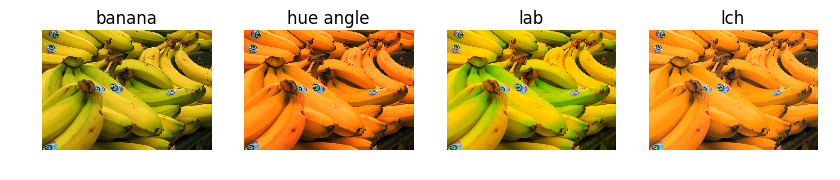

In [47]:
keyword, zfile, zfile_l = ('banana-1', 'z-values/banana.pkl', 'z-values/banana-local.pkl')
zcollection = pickle.load(open(zfile, 'rb'))
zcollection_l = pickle.load(open(zfile_l, 'rb'))

image = imread(originals_path / ('%s.jpg' % keyword))
mask_path = masks_path / ('%s-mask.png' % keyword)
if mask_path.exists():
    seg_b = imread(mask_path).astype(np.bool)
else:
    seg_b = imread(masks_path / ('%s-mask.jpg' % keyword)).astype(np.bool)


image_comparator = ImageComparator()
top_n = 3

plt.rcParams['figure.figsize'] = 10, 10

plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('banana')
plt.axis('off')

cis = image_comparator.compare(image, zcollection)[:top_n]
for idx, ci in enumerate(cis):
    key = ci.key
    delta = ci.delta
    z_delta = zcollection.descriptors[key].descriptor * delta
    # Global enhancement
    result_g_g_g = ENHANCERS[key].enhance(image, z_delta, 1)
    
    plt.subplot(1, 4, idx + 2)
    plt.imshow(result_g_g_g)
    plt.title(key.replace('_', ' ')[:-5])
    plt.axis('off')
    
plt.savefig('banana-top-3.jpg', transparent = True, bbox_inches='tight', pad_inches=0)

In [12]:
image = imread('grass.jpg')
zcollection = pickle.load(open('z-values/grass.pkl', 'rb'))

key = 'hue_angle_hist'
zv = zcollection.descriptors[key].descriptor

image_comparator = ImageComparator()
cis = image_comparator.compare(image, zcollection)[:3]
wm = ENHANCERS[key].compute_weight_map(image, zv)

enh = ENHANCERS[key].enhance(image, cis[0].delta * zv, 2)

result = (enh * wm + (1 - wm) * image).astype(np.uint8)

imsave('weight-map.jpg', wm)
imsave('result-grass.jpg', result)

In [10]:
[ci.key for ci in cis]

['hue_angle_hist', 'rgb_hist', 'gray_hist']